# Práctica m27 - "Iris" Dataset (K-Means)

In [7]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb
import os
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

os.chdir("./")

In [9]:
dataset = pd.read_csv("iris.csv")
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [19]:
values = dataset.drop("variety", axis = 1)
values

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [21]:
wcss = []
for index in range(1,11):
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state = 2)
    kmeans.fit(values)

    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Weighted Cluster Sum of Squares')

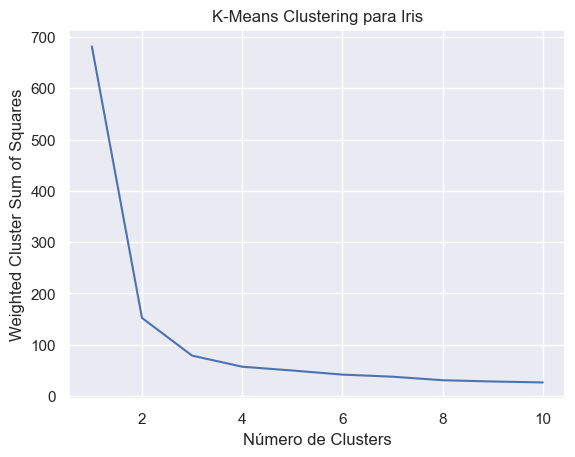

In [27]:
# Gráfico del Codo
sb.set()
mp.plot(range(1,11), wcss)
mp.title("K-Means Clustering para Iris")
mp.xlabel("Número de Clusters")
mp.ylabel("Weighted Cluster Sum of Squares")

In [29]:
# Criterio de la Silueta
from sklearn import datasets
from sklearn.metrics import silhouette_score

In [37]:
X = values.to_numpy()
for j in range(2, 12):
    kmeans = KMeans(n_clusters = j, random_state = 42)
    kmeans.fit_predict(X)
    score = silhouette_score(X, kmeans.labels_, metric = "euclidean")
    print("Score Silhouette: ", "k = ", j, ":", score)

Score Silhouette:  k =  2 : 0.6810461692117464
Score Silhouette:  k =  3 : 0.5511916046195922
Score Silhouette:  k =  4 : 0.4976433179321928
Score Silhouette:  k =  5 : 0.4930804067193526
Score Silhouette:  k =  6 : 0.36784649847122486
Score Silhouette:  k =  7 : 0.3542978877198852
Score Silhouette:  k =  8 : 0.34467972180562
Score Silhouette:  k =  9 : 0.315588785338977
Score Silhouette:  k =  10 : 0.30141437453251435
Score Silhouette:  k =  11 : 0.26873562164120274


In [39]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 42)
cluster_values = kmeans.fit_predict(values)
print(cluster_values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [51]:
agrupacion1 = pd.DataFrame(cluster_values, columns = ["Group"])
agrupacion1 = pd.concat([dataset, agrupacion1], axis = 1, join = "inner")
agrupacion1

,sepal.length,sepal.width,petal.length,petal.width,variety,Group
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,1
2,4.7,3.2,1.3,0.2,Setosa,1
3,4.6,3.1,1.5,0.2,Setosa,1
4,5.0,3.6,1.4,0.2,Setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,0
146,6.3,2.5,5.0,1.9,Virginica,0
147,6.5,3.0,5.2,2.0,Virginica,0
148,6.2,3.4,5.4,2.3,Virginica,0


# Descomposición Mediante PCA

In [54]:
pca_values = values.values
print(pca_values)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [56]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)
pca.fit(pca_values)
pca_values = pca.transform(pca_values)
pca_values

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [58]:
wcss2 = []

for index in range(1,11):
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state = 2)
    kmeans.fit(pca_values)

    wcss2.append(kmeans.inertia_)

Text(0, 0.5, 'Weighted Cluster Sum of Squares')

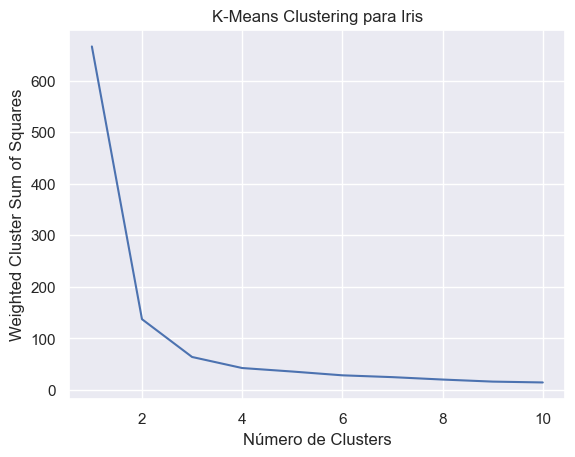

In [60]:
# Gráfico del Codo
sb.set()
mp.plot(range(1,11), wcss2)
mp.title("K-Means Clustering para Iris")
mp.xlabel("Número de Clusters")
mp.ylabel("Weighted Cluster Sum of Squares")

In [64]:
# Criterio de Silueta
for j in range(2, 12):
    kmeans = KMeans(n_clusters = j, random_state = 42)
    kmeans.fit_predict(pca_values)
    score = silhouette_score(pca_values, kmeans.labels_, metric = "euclidean")
    print("Score Silhouette: ", "k = ", j, ":", score)

Score Silhouette:  k =  2 : 0.705670322509188
Score Silhouette:  k =  3 : 0.5976764219497546
Score Silhouette:  k =  4 : 0.5577409232179588
Score Silhouette:  k =  5 : 0.5100407194716486
Score Silhouette:  k =  6 : 0.4031973873561552
Score Silhouette:  k =  7 : 0.38682639975495786
Score Silhouette:  k =  8 : 0.440760332470465
Score Silhouette:  k =  9 : 0.40201438761056096
Score Silhouette:  k =  10 : 0.41588658014924934
Score Silhouette:  k =  11 : 0.399432551902981


In [66]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 42)
cluster_values = kmeans.fit_predict(pca_values)
print(cluster_values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


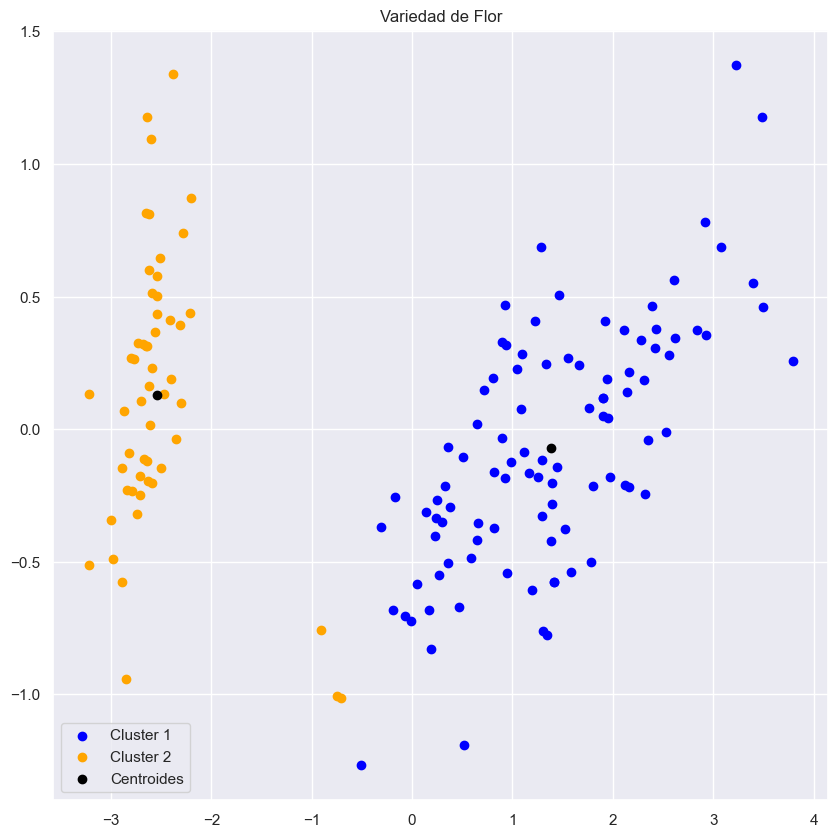

In [68]:
mp.figure(figsize = (10,10))
mp.scatter(pca_values[cluster_values == 0, 0], pca_values[cluster_values == 0, 1], c = "blue", label = 'Cluster 1')
mp.scatter(pca_values[cluster_values == 1, 0], pca_values[cluster_values == 1, 1], c = "orange", label = 'Cluster 2')

mp.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = "black", label = 'Centroides')

mp.title("Variedad de Flor")
mp.legend()

In [70]:
agrupacion2 = pd.DataFrame(cluster_values, columns = ["Group"])
agrupacion2 = pd.concat([dataset, agrupacion2], axis = 1, join = "inner")
agrupacion2

,sepal.length,sepal.width,petal.length,petal.width,variety,Group
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,1
2,4.7,3.2,1.3,0.2,Setosa,1
3,4.6,3.1,1.5,0.2,Setosa,1
4,5.0,3.6,1.4,0.2,Setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,0
146,6.3,2.5,5.0,1.9,Virginica,0
147,6.5,3.0,5.2,2.0,Virginica,0
148,6.2,3.4,5.4,2.3,Virginica,0
